## ***Mobile Device Usage and User Behavior Dataset***

### Descrição das colunas
    User ID: Unique identifier for each user.
    Device Model: Model of the user's smartphone.
    Operating System: The OS of the device (iOS or Android).
    App Usage Time: Daily time spent on mobile applications, measured in minutes.
    Screen On Time: Average hours per day the screen is active.
    Battery Drain: Daily battery consumption in mAh.
    Number of Apps Installed: Total apps available on the device.
    Data Usage: Daily mobile data consumption in megabytes.
    Age: Age of the user.
    Gender: Gender of the user (Male or Female).
    User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).


##### Leitura do dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


##### Verficação dos tipos de dados de cada coluna
###### Aqui, podemos ver o nome e ordem de todas as colunas e também se alguma dessas colunas possui tipo de dado incoerente.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


##### Estatísticas das colunas numéricas
###### São elas: contagem, média, desvio padrão, mínimo e máximo, primeiro, segundo e terceiro quartil.

In [3]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


##### Verificação de ocorrência de dados nulos

In [4]:
df.isna().any()

User ID                       False
Device Model                  False
Operating System              False
App Usage Time (min/day)      False
Screen On Time (hours/day)    False
Battery Drain (mAh/day)       False
Number of Apps Installed      False
Data Usage (MB/day)           False
Age                           False
Gender                        False
User Behavior Class           False
dtype: bool

Não há dados nulos em nenhuma das colunas

##### Remoção de colunas que não serão usadas na nossa análise
###### São elas: User ID e User Behavior Class

In [5]:
df = df.drop(["User ID", "User Behavior Class"], axis=1)
df.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


##### Sistemas operacionais que estão presentes no dataset e suas respectivas frequências absolutas

In [6]:
group_operating_system = df.groupby('Operating System').size() # quantidade de valores de cada sistema operacional
group_operating_system

Operating System
Android    554
iOS        146
dtype: int64

Aqui vemos que o sistema operacional que mais aparece é Android

##### Modelos de aparelho que estão presentes no dataset e suas respectivas frequências absolutas

In [7]:
group_device_model= df.groupby('Device Model').size() # quantidade de valores de cada modelo de celular
group_device_model

Device Model
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Xiaomi Mi 11          146
iPhone 12             146
dtype: int64

Podemos observar que os aparelhos mais frequentes são:  Xiaomi Mi 11 e iPhone 12

##### Histograma da distribuição do tempo de tela

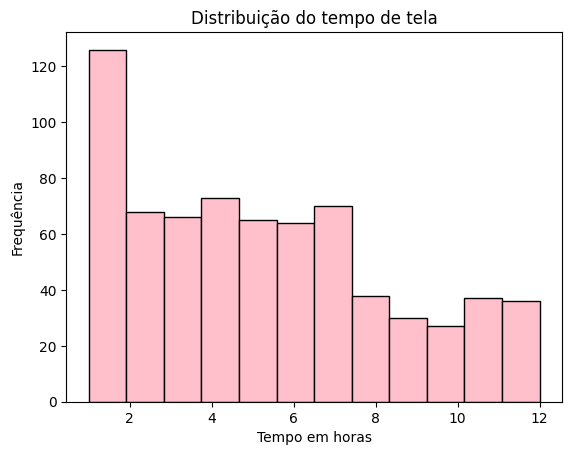

In [8]:
screem_on_time= df['Screen On Time (hours/day)']

plt.hist(screem_on_time, bins=12, color='pink', edgecolor='black')

plt.title('Distribuição do tempo de tela')
plt.xlabel('Tempo em horas')
plt.ylabel('Frequência')

plt.show()

Estatísticas da coluna Screen On Time (hours/day)

In [23]:
media=round(df.describe()['Screen On Time (hours/day)']['mean'],2)
print('As pessoas gastam em média',media,'horas por dia nas telas')
dp=round(df.describe()['Screen On Time (hours/day)']['std'],2)
print('Desvio padrão do tempo (em horas) de tela é: ',dp)

Desvio padrão do tempo (em horas) de tela é:  3.07
As pessoas gastam em média 5.27 horas por dia nas telas


Esse desvio padrão pode sugerir que a distribuição é moderada, ou seja, não há frequências extremamente discrepantes. Isso pode ser observado no histograma, onde há um intervalo de frequência mais alta [1h e 2h), mas os outros intervalos possuem frequências relativamente parecidas, principalmente entre (2h e 7,5h] e entre (7,5h e 12h]

Coeficiente de Variação (CV) padroniza o desvio padrão como uma porcentagem da média, se essa porcentagem for muito alta, siginifica que 

In [15]:
statisticsScreenOnTime=df.describe()['Screen On Time (hours/day)']
media=statisticsScreenOnTime['mean']
dp=statisticsScreenOnTime['std']
cv=dp/media
round(cv*100,2)

58.2

In [11]:
tempo_por_sistema_operacional=df[['Screen On Time (hours/day)','Operating System']]

Vemos um histograma qu mostra a distribuição do tempo de tela, no eixo x estão os intervalos em horas e no eixo y está a frequência absoluta. Nele vemos que o intervalo de maior frequência é de 1h a 2h, ou seja, a maior parte das pessoas passam entre 1h e 2h do seu dia na tela do celular. Entretanto, também é possível observar que a frequência nesses intervalos é bem distribuída, de modo que não há nenhum intervalo de 1 a 12 com uma frequência ex 